In [254]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

Importing DataSet

In [255]:
df=pd.read_csv('https://raw.githubusercontent.com/dsrscientist/DSData/master/Telecom_customer_churn.csv')
df

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,6840-RESVB,Male,0,Yes,Yes,24,Yes,Yes,DSL,Yes,...,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.5,No
7039,2234-XADUH,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.9,No
7040,4801-JZAZL,Female,0,Yes,Yes,11,No,No phone service,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,No
7041,8361-LTMKD,Male,1,Yes,No,4,Yes,Yes,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Mailed check,74.40,306.6,Yes


The dataset contains the details of customers in which both numerical and categorical data presents. Here Churn is the target variable which contains 2 categories so it will be termerd as classification where we need to predict several churn using classification models



In [256]:
df.head(15)

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
5,9305-CDSKC,Female,0,No,No,8,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,99.65,820.5,Yes
6,1452-KIOVK,Male,0,No,Yes,22,Yes,Yes,Fiber optic,No,...,No,No,Yes,No,Month-to-month,Yes,Credit card (automatic),89.10,1949.4,No
7,6713-OKOMC,Female,0,No,No,10,No,No phone service,DSL,Yes,...,No,No,No,No,Month-to-month,No,Mailed check,29.75,301.9,No
8,7892-POOKP,Female,0,Yes,No,28,Yes,Yes,Fiber optic,No,...,Yes,Yes,Yes,Yes,Month-to-month,Yes,Electronic check,104.80,3046.05,Yes
9,6388-TABGU,Male,0,No,Yes,62,Yes,No,DSL,Yes,...,No,No,No,No,One year,No,Bank transfer (automatic),56.15,3487.95,No


# Exploratory Data Analysis

In [257]:
#Checking shape of Dataset

df.shape

(7043, 21)

The dataset contain 7043 rows and 21 columns. Out of which 1 target varaible and remaining others are independent variables

In [258]:
df.columns

Index(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

In [259]:
# Checking the columns of dataset
df.columns.tolist()

['customerID',
 'gender',
 'SeniorCitizen',
 'Partner',
 'Dependents',
 'tenure',
 'PhoneService',
 'MultipleLines',
 'InternetService',
 'OnlineSecurity',
 'OnlineBackup',
 'DeviceProtection',
 'TechSupport',
 'StreamingTV',
 'StreamingMovies',
 'Contract',
 'PaperlessBilling',
 'PaymentMethod',
 'MonthlyCharges',
 'TotalCharges',
 'Churn']

In [260]:
df.dtypes

customerID           object
gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges         object
Churn                object
dtype: object

In [261]:
df.isnull().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

In [262]:
df.isnull().sum().sum()

0

In [263]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


<Axes: >

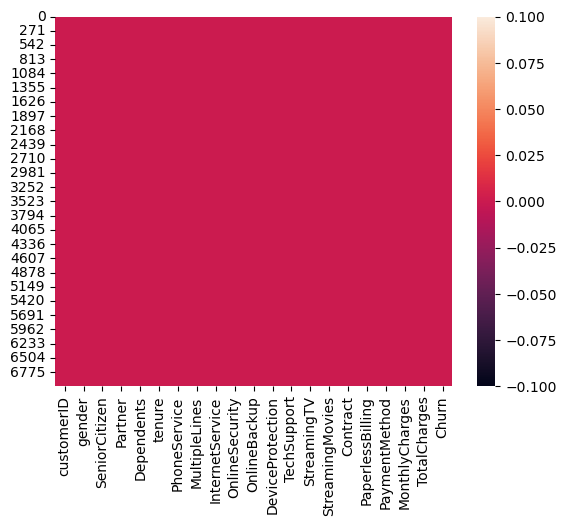

In [264]:
#Let's visulize using heatmap
sns.heatmap(df.isnull())

In [265]:
df['TotalCharges'].unique()

array(['29.85', '1889.5', '108.15', ..., '346.45', '306.6', '6844.5'],
      dtype=object)

In [266]:
df['TotalCharges'].nunique()

6531

In [267]:
#Checking the values of each column
for i in df.columns:
    print(df[i].value_counts())
    print("\n")

customerID
7590-VHVEG    1
3791-LGQCY    1
6008-NAIXK    1
5956-YHHRX    1
5365-LLFYV    1
             ..
9796-MVYXX    1
2637-FKFSY    1
1552-AAGRX    1
4304-TSPVK    1
3186-AJIEK    1
Name: count, Length: 7043, dtype: int64


gender
Male      3555
Female    3488
Name: count, dtype: int64


SeniorCitizen
0    5901
1    1142
Name: count, dtype: int64


Partner
No     3641
Yes    3402
Name: count, dtype: int64


Dependents
No     4933
Yes    2110
Name: count, dtype: int64


tenure
1     613
72    362
2     238
3     200
4     176
     ... 
28     57
39     56
44     51
36     50
0      11
Name: count, Length: 73, dtype: int64


PhoneService
Yes    6361
No      682
Name: count, dtype: int64


MultipleLines
No                  3390
Yes                 2971
No phone service     682
Name: count, dtype: int64


InternetService
Fiber optic    3096
DSL            2421
No             1526
Name: count, dtype: int64


OnlineSecurity
No                     3498
Yes                    2019
No inte

There are the values counts of all columns and we can see blank in TotalCharges column. Let's check out unique values of that column. There are differnce between white space and null values

In [268]:
df['TotalCharges'].unique()

array(['29.85', '1889.5', '108.15', ..., '346.45', '306.6', '6844.5'],
      dtype=object)

We can notice that "TotalCharges" has continous data but its reflecting as object datatype. And 11 record of this column has blank data. Lets handle this column

In [269]:
df.loc[df["TotalCharges"]==" "]

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
488,4472-LVYGI,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,...,Yes,Yes,Yes,No,Two year,Yes,Bank transfer (automatic),52.55,,No
753,3115-CZMZD,Male,0,No,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.25,,No
936,5709-LVOEQ,Female,0,Yes,Yes,0,Yes,No,DSL,Yes,...,Yes,No,Yes,Yes,Two year,No,Mailed check,80.85,,No
1082,4367-NUYAO,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.75,,No
1340,1371-DWPAZ,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,...,Yes,Yes,Yes,No,Two year,No,Credit card (automatic),56.05,,No
3331,7644-OMVMY,Male,0,Yes,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,19.85,,No
3826,3213-VVOLG,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.35,,No
4380,2520-SGTTA,Female,0,Yes,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.00,,No
5218,2923-ARZLG,Male,0,Yes,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,One year,Yes,Mailed check,19.70,,No
6670,4075-WKNIU,Female,0,Yes,Yes,0,Yes,Yes,DSL,No,...,Yes,Yes,Yes,No,Two year,No,Mailed check,73.35,,No


In [270]:
#All these above location has null values
df["TotalCharges"]= df["TotalCharges"].replace(" ", np.nan)
df["TotalCharges"].value_counts()

TotalCharges
20.2      11
19.75      9
20.05      8
19.9       8
19.65      8
          ..
6849.4     1
692.35     1
130.15     1
3211.9     1
6844.5     1
Name: count, Length: 6530, dtype: int64

Length is changed now before 6531 now 6530 cause null value not consider as a unique

In [271]:
df.isna().sum()

customerID           0
gender               0
SeniorCitizen        0
Partner              0
Dependents           0
tenure               0
PhoneService         0
MultipleLines        0
InternetService      0
OnlineSecurity       0
OnlineBackup         0
DeviceProtection     0
TechSupport          0
StreamingTV          0
StreamingMovies      0
Contract             0
PaperlessBilling     0
PaymentMethod        0
MonthlyCharges       0
TotalCharges        11
Churn                0
dtype: int64

In [272]:
#Now 11 values null in TotalCharges
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [273]:
## Convert object datatype to float datatype
df['TotalCharges']= df['TotalCharges'].astype(float)
df['TotalCharges'].dtype

dtype('float64')

In [248]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


Categorical data we use fill null values by mode and mean or median in numerical data or continous

In [144]:
np.mean(df["TotalCharges"])

2283.3004408418656

In [145]:
df.iloc[488:500,:]

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
488,4472-LVYGI,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,...,Yes,Yes,Yes,No,Two year,Yes,Bank transfer (automatic),52.55,NaN,No
489,8372-JUXUI,Male,0,No,Yes,1,Yes,Yes,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,74.35,74.35,Yes
490,3552-CTCYF,Male,0,Yes,Yes,63,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,Two year,Yes,Bank transfer (automatic),104.80,6597.25,No
491,6778-YSNIH,Female,0,No,No,2,Yes,No,DSL,No,...,No,No,Yes,No,Month-to-month,Yes,Electronic check,59.00,114.15,No
492,0388-EOPEX,Female,0,Yes,No,2,Yes,No,Fiber optic,Yes,...,No,No,No,No,Month-to-month,Yes,Electronic check,74.40,139.40,Yes
493,5756-OZRIO,Male,1,Yes,No,61,Yes,Yes,DSL,No,...,No,No,No,Yes,One year,No,Bank transfer (automatic),64.05,3902.60,No
494,6579-JPICP,Male,0,No,No,1,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Month-to-month,No,Mailed check,20.40,20.40,No
495,8205-OTCHB,Male,0,No,No,22,No,No phone service,DSL,No,...,Yes,No,No,Yes,One year,Yes,Bank transfer (automatic),43.75,903.60,Yes
496,4134-BSXLX,Male,0,Yes,No,28,Yes,No,DSL,Yes,...,No,Yes,No,No,Month-to-month,No,Mailed check,60.90,1785.65,No
497,0505-SPOOW,Female,0,Yes,No,70,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Bank transfer (automatic),19.80,1397.65,No


In [146]:
df['TotalCharges']= df['TotalCharges'].fillna(df['TotalCharges'].mean())

In [147]:
df.isnull().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

In [148]:
df.iloc[488,:]

customerID                         4472-LVYGI
gender                                 Female
SeniorCitizen                               0
Partner                                   Yes
Dependents                                Yes
tenure                                      0
PhoneService                               No
MultipleLines                No phone service
InternetService                           DSL
OnlineSecurity                            Yes
OnlineBackup                               No
DeviceProtection                          Yes
TechSupport                               Yes
StreamingTV                               Yes
StreamingMovies                            No
Contract                             Two year
PaperlessBilling                          Yes
PaymentMethod       Bank transfer (automatic)
MonthlyCharges                          52.55
TotalCharges                      2283.300441
Churn                                      No
Name: 488, dtype: object

Now we can see no null values in any column

In [149]:
#Separating numerical and categorical columns

In [150]:
#Checking for categorical columns
categorical_col= []
for i in df.dtypes.index:
    if df.dtypes[i]=="object":
        categorical_col.append(i)
print("Categorical Columns: ", categorical_col)
print("\n")


#Checking for Numerical columns
numerical_col= []
for i in df.dtypes.index:
    if df.dtypes[i]!="object":
        numerical_col.append(i)
print("Numerical Columns: ", numerical_col)
print("\n")

Categorical Columns:  ['customerID', 'gender', 'Partner', 'Dependents', 'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod', 'Churn']


Numerical Columns:  ['SeniorCitizen', 'tenure', 'MonthlyCharges', 'TotalCharges']




In [151]:
#Checking number of unique values in each column
df.nunique().to_frame("No of unique Values")


,No of unique Values
customerID,7043
gender,2
SeniorCitizen,2
Partner,2
Dependents,2
tenure,73
PhoneService,2
MultipleLines,3
InternetService,3
OnlineSecurity,3


In [152]:
df.drop("customerID", axis=1, inplace=True)
df.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No
2,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [153]:
df['Churn'].unique()

array(['No', 'Yes'], dtype=object)

In [154]:
#Our classification problem in binary classification beacuse two possible outcome either yes or no

df['Churn'].value_counts()

Churn
No     5174
Yes    1869
Name: count, dtype: int64

# Description of Dataset

In [155]:
df.describe()

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges
count,7043.000000,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692,2283.300441
std,0.368612,24.559481,30.090047,2265.000258
min,0.000000,0.000000,18.250000,18.800000
25%,0.000000,9.000000,35.500000,402.225000
50%,0.000000,29.000000,70.350000,1400.550000
75%,0.000000,55.000000,89.850000,3786.600000
max,1.000000,72.000000,118.750000,8684.800000


This gives the statistical information of the numerical columns. The summary of the dataset looks perfect since there is no negative/invalid value present.

From above observation we can observe:

1) The counts of all columns are same mean no null values in dataset
2)The mean value is greater than the median(50%) in tenure and TotalCharges columns which means data is skewed to right in these column
3) The data in the column MonthlyCharges have mean value less than median which means the data is skewewd to left.
4) By Summarizing the data we can observe there is huge difference between 75% and max hence there are outliers presents in the data
5) We can also notice the standard deviation, min, 25% percentile values from describe method

Data Visulization

Univariate Analysis

Churn
No     5174
Yes    1869
Name: count, dtype: int64


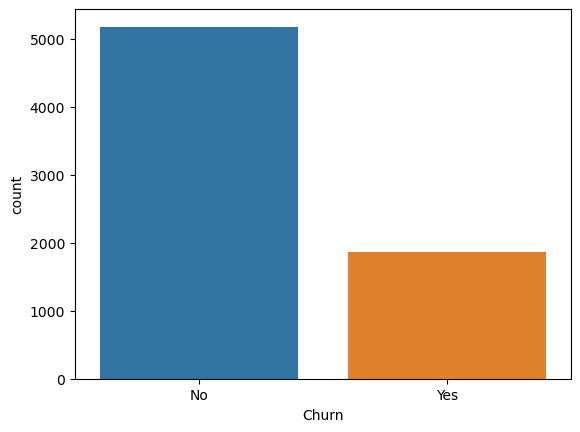

In [156]:
ax= sns.countplot(x='Churn', data=df)
print(df['Churn'].value_counts())

We can observed that the count of "No Churn" are high compared to the number of "Yes Churn" i.e there are more number of customer who have not churned. This leeds to class imbalance issue in data. we will rectify this by oversampling sampling method.

gender
Male      3555
Female    3488
Name: count, dtype: int64


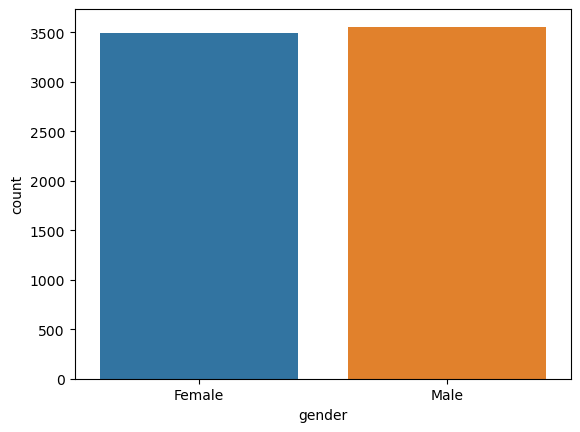

In [157]:
ax= sns.countplot(x='gender', data=df)
print(df['gender'].value_counts())

SeniorCitizen
0    5901
1    1142
Name: count, dtype: int64


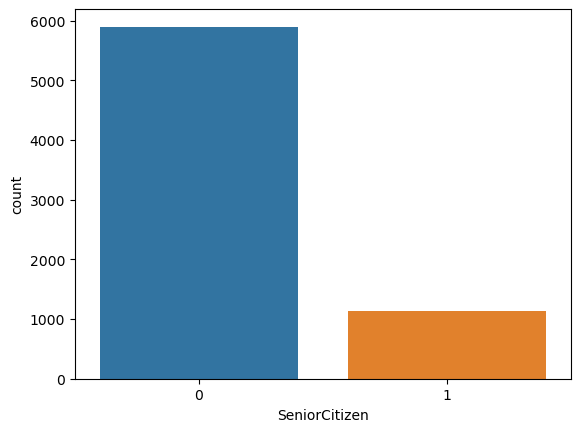

In [158]:
ax= sns.countplot(x='SeniorCitizen', data=df)
print(df['SeniorCitizen'].value_counts())

Here 0 represent non sensior citizen while 1 represent senior citizen

Partner
No     3641
Yes    3402
Name: count, dtype: int64


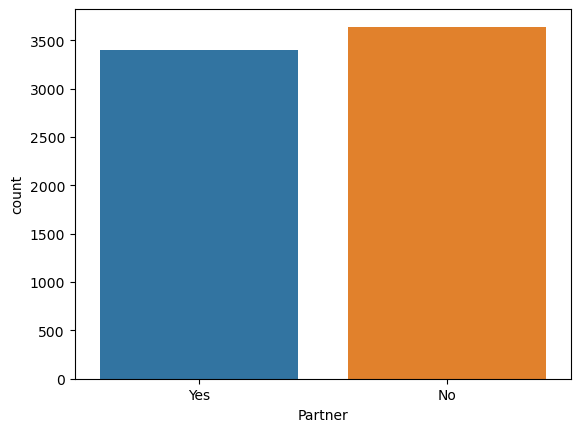

In [159]:
ax= sns.countplot(x='Partner', data=df)
print(df['Partner'].value_counts())

Dependents
No     4933
Yes    2110
Name: count, dtype: int64


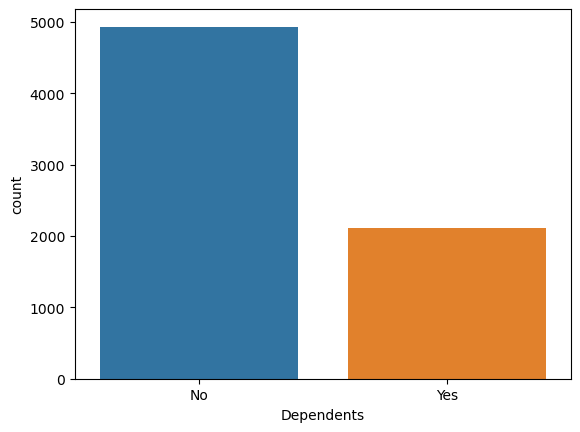

In [160]:
ax= sns.countplot(x='Dependents', data=df)
print(df['Dependents'].value_counts())

PhoneService
Yes    6361
No      682
Name: count, dtype: int64


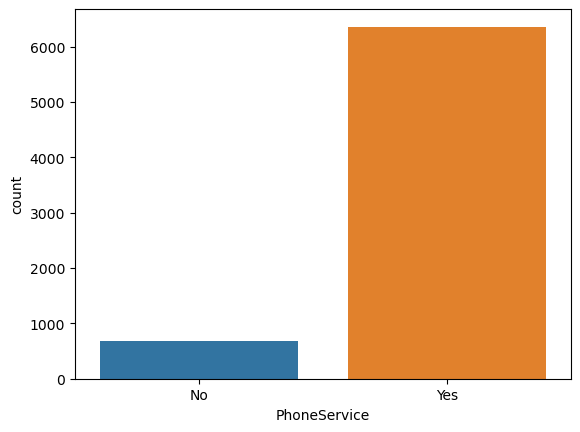

In [161]:
ax= sns.countplot(x='PhoneService', data=df)
print(df['PhoneService'].value_counts())

The customer who have Phone Service are high in number who do not have phone service

MultipleLines
No                  3390
Yes                 2971
No phone service     682
Name: count, dtype: int64


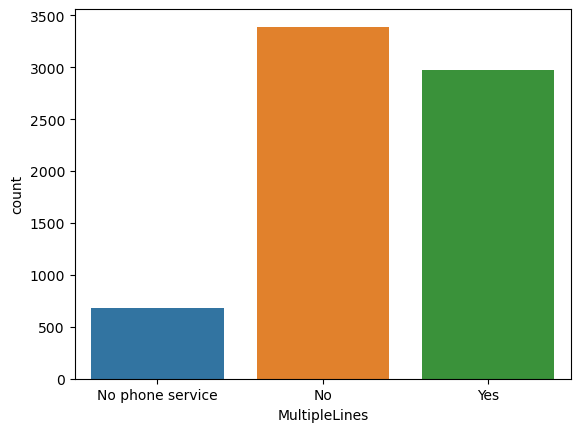

In [162]:
ax= sns.countplot(x='MultipleLines', data=df)
print(df['MultipleLines'].value_counts())

OnlineSecurity
No                     3498
Yes                    2019
No internet service    1526
Name: count, dtype: int64


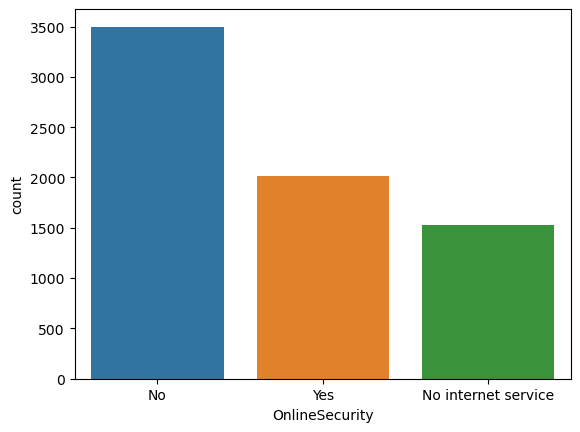

In [163]:
ax= sns.countplot(x='OnlineSecurity', data=df)
print(df['OnlineSecurity'].value_counts())

OnlineBackup
No                     3088
Yes                    2429
No internet service    1526
Name: count, dtype: int64


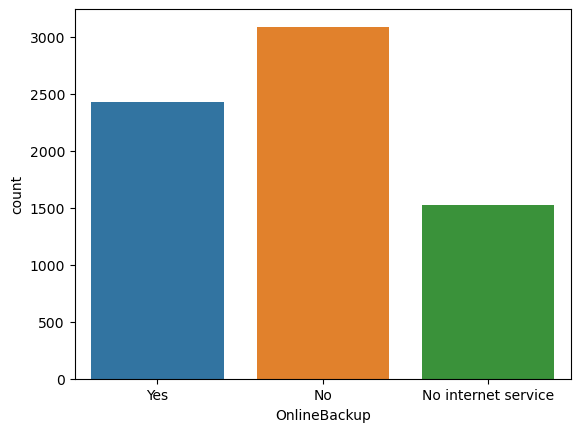

In [164]:
ax= sns.countplot(x='OnlineBackup', data=df)
print(df['OnlineBackup'].value_counts())

DeviceProtection
No                     3095
Yes                    2422
No internet service    1526
Name: count, dtype: int64


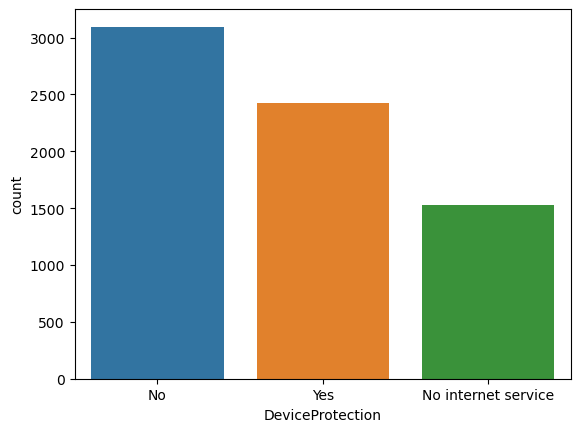

In [165]:
ax= sns.countplot(x='DeviceProtection', data=df)
print(df['DeviceProtection'].value_counts())

TechSupport
No                     3473
Yes                    2044
No internet service    1526
Name: count, dtype: int64


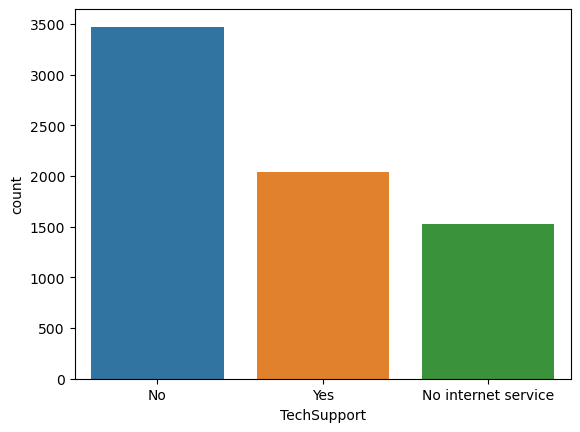

In [166]:
ax= sns.countplot(x='TechSupport', data=df)
print(df['TechSupport'].value_counts())

StreamingTV
No                     2810
Yes                    2707
No internet service    1526
Name: count, dtype: int64


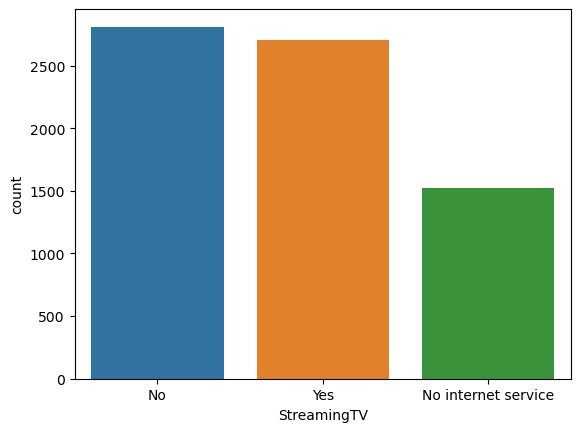

In [167]:
ax= sns.countplot(x='StreamingTV', data=df)
print(df['StreamingTV'].value_counts())

StreamingMovies
No                     2785
Yes                    2732
No internet service    1526
Name: count, dtype: int64


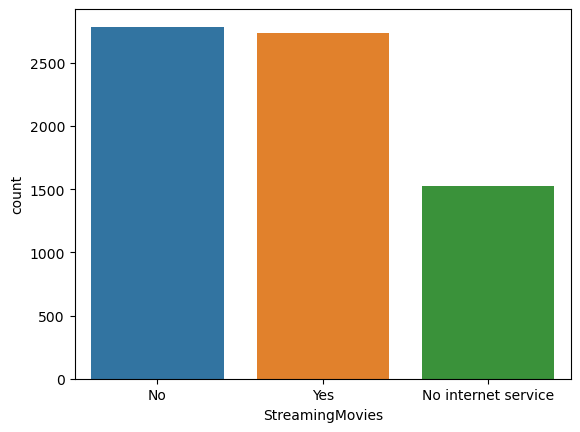

In [168]:
ax= sns.countplot(x='StreamingMovies', data=df)
print(df['StreamingMovies'].value_counts())

Contract
Month-to-month    3875
Two year          1695
One year          1473
Name: count, dtype: int64


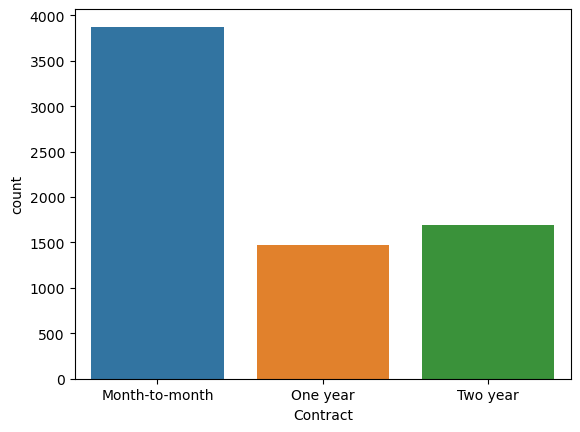

In [169]:
ax= sns.countplot(x='Contract', data=df)
print(df['Contract'].value_counts())

PaperlessBilling
Yes    4171
No     2872
Name: count, dtype: int64


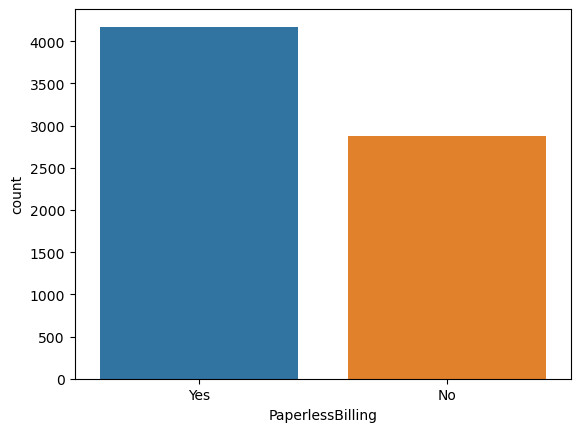

In [170]:
ax= sns.countplot(x='PaperlessBilling', data=df)
print(df['PaperlessBilling'].value_counts())

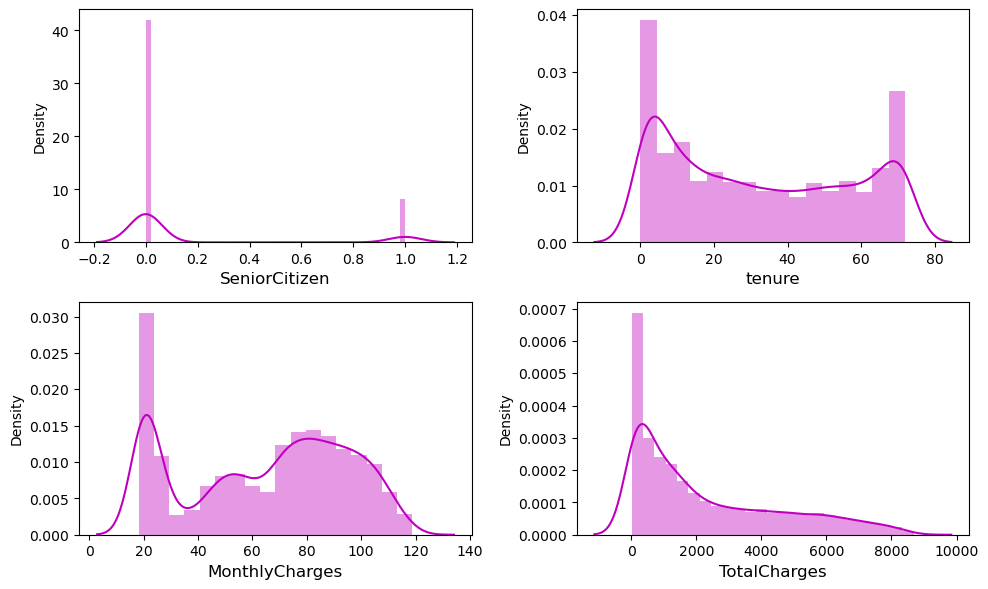

In [171]:
#Let's check how data has been distributed in remaining columns
plt.figure(figsize=(10,6), facecolor='white')
plotnumber=1
for col in numerical_col:
    if plotnumber<=4:
        ax= plt.subplot(2,2, plotnumber)
        sns.distplot(df[col], color='m')
        plt.xlabel(col, fontsize=12)
        plt.yticks(rotation=0, fontsize=10)
    plotnumber+=1
plt.tight_layout()

From the above distribution plots we can notice that the data almost looks normal in all columns except SeniorCitizen, and the data in the column TotalCharges is skewed to the right. Other two columns tunre and MonthlyCharges do not have skewness

**BiVariate Analysis**

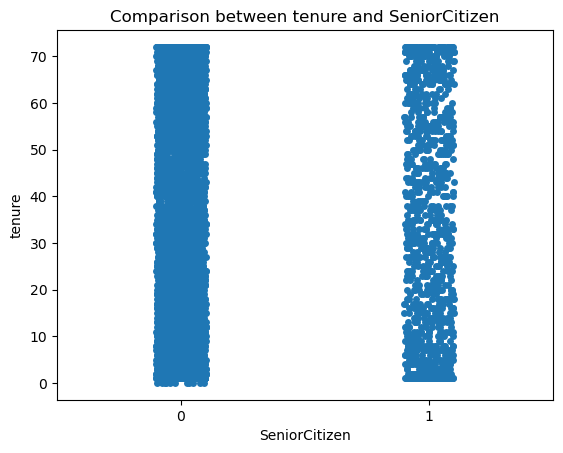

In [172]:
#Comparing tenure and Senior Citizen
plt.title("Comparison between tenure and SeniorCitizen")
sns.stripplot(x= 'SeniorCitizen', y='tenure', data=df)
plt.show()

There is no Significant between features, here both features are equal in length.

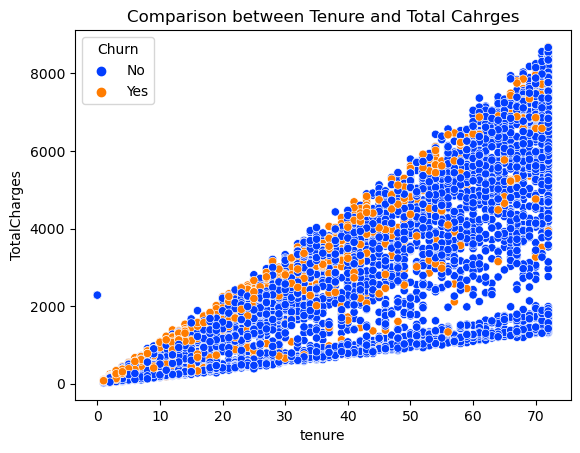

In [173]:
#Comparing tenure and TotalCharges
plt.title("Comparison between Tenure and Total Cahrges")
sns.scatterplot(x= 'tenure', y='TotalCharges', data=df, hue='Churn', palette= 'bright')
plt.show()

Here we can notice the strong linear relation between the features
As the tenure increases, TotalCharges also increasing rapidly. If the customer has low tenure services than there is high chance of churn

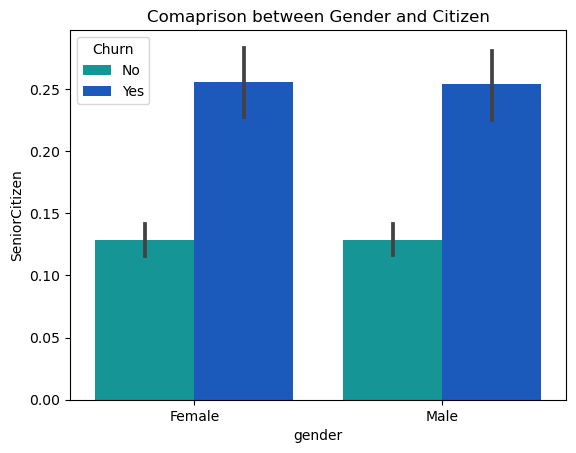

In [174]:
#Comparing gender and Ctizen on the basis of Churn
plt.title("Comaprison between Gender and Citizen")
sns.barplot(x='gender', y='SeniorCitizen', data=df, palette= 'winter_r', hue='Churn')
plt.show()

There is no significant difference between the columns. The cutomers churn remians uneffected in gender and Senior citizen.

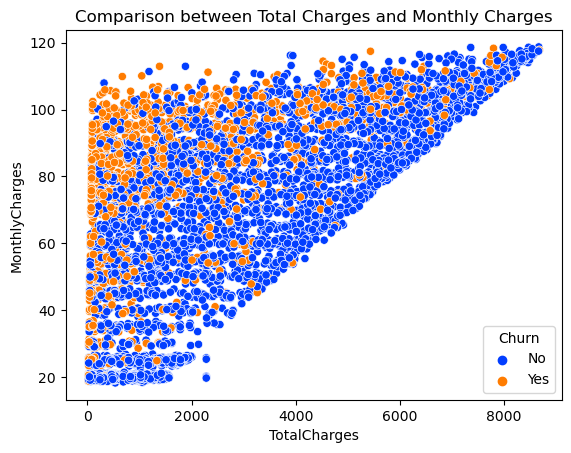

In [175]:
#Comparison between Total Charges and Monthly Charges
plt.title("Comparison between Total Charges and Monthly Charges")
sns.scatterplot(x='TotalCharges', y='MonthlyCharges', data=df, hue='Churn', palette='bright')
plt.show()

There is a linear relationship between the features. The customer with high monthly charges have high tendency to stop the services since they have high total charges
Also if the customers ready to contribute with the monthly charges then there is increment in total charges

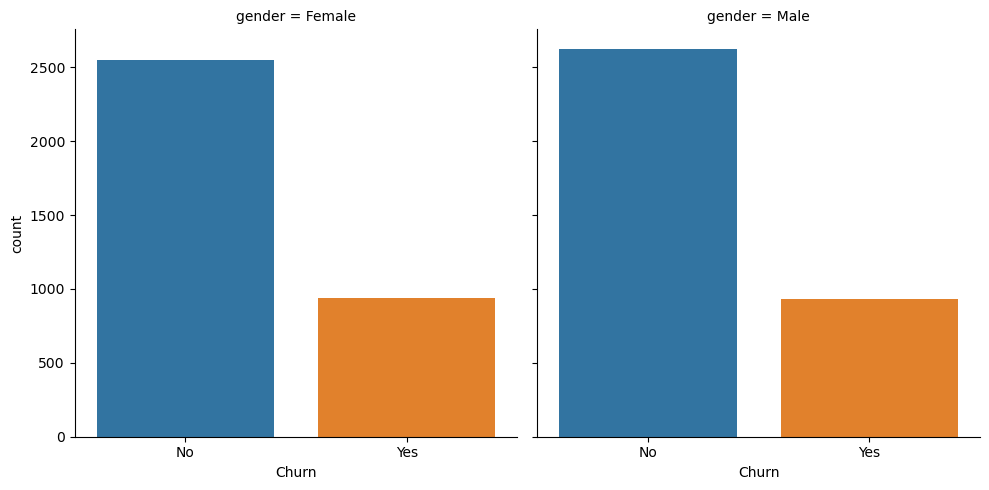

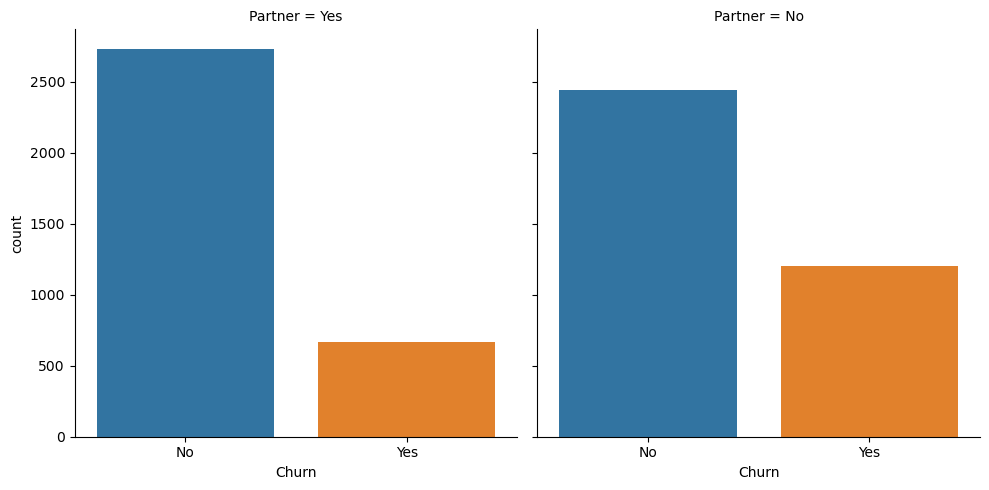

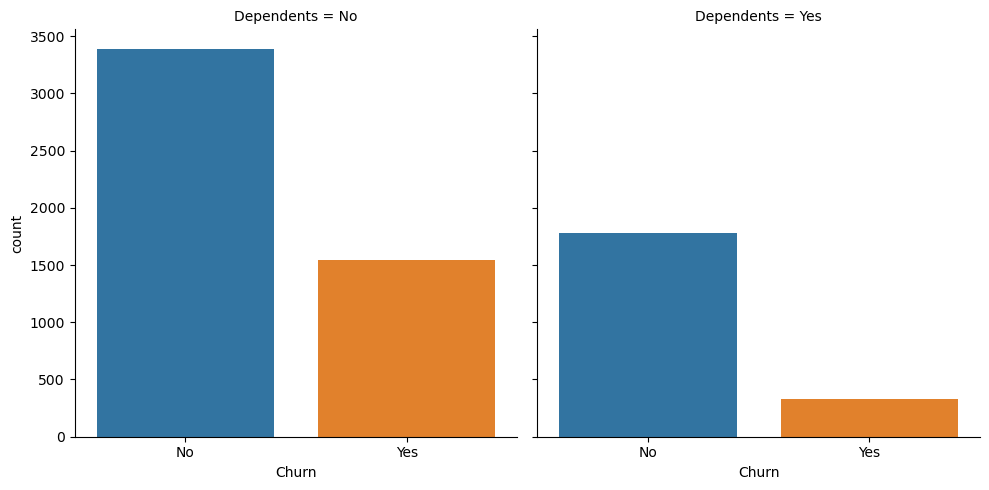

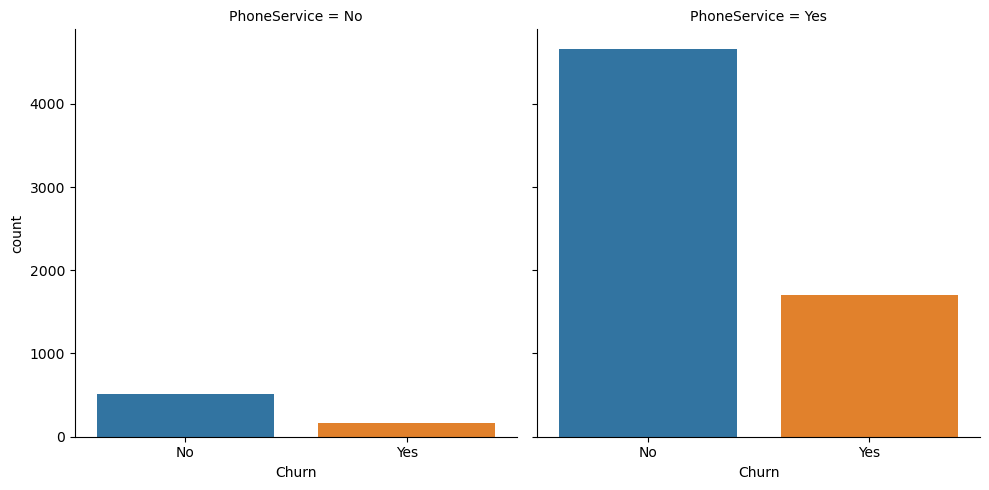

In [176]:
#Checking churn level and gender
sns.catplot(x='Churn', col='gender', data=df, kind='count')

#CHecking churn level and Partner
sns.catplot(x='Churn', col='Partner', data=df, kind='count')

#Checking churn level and Dependents
sns.catplot(x='Churn', col='Dependents', data=df, kind='count')

#Checking Churn level in Phone Services
sns.catplot(x='Churn', col='PhoneService', data=df, kind='count')

1) In the first plot we can see that there is no significant differences in genders, both genders have equal churn level

2) In the Second plot we can see that the customers without partners have high churn rate compared to the customer with partner

3) The customer sho do not have any dependent have high churn rate as compared to dependent

4) In the last plot we can see customer who have phone services have high tendency of getting churned


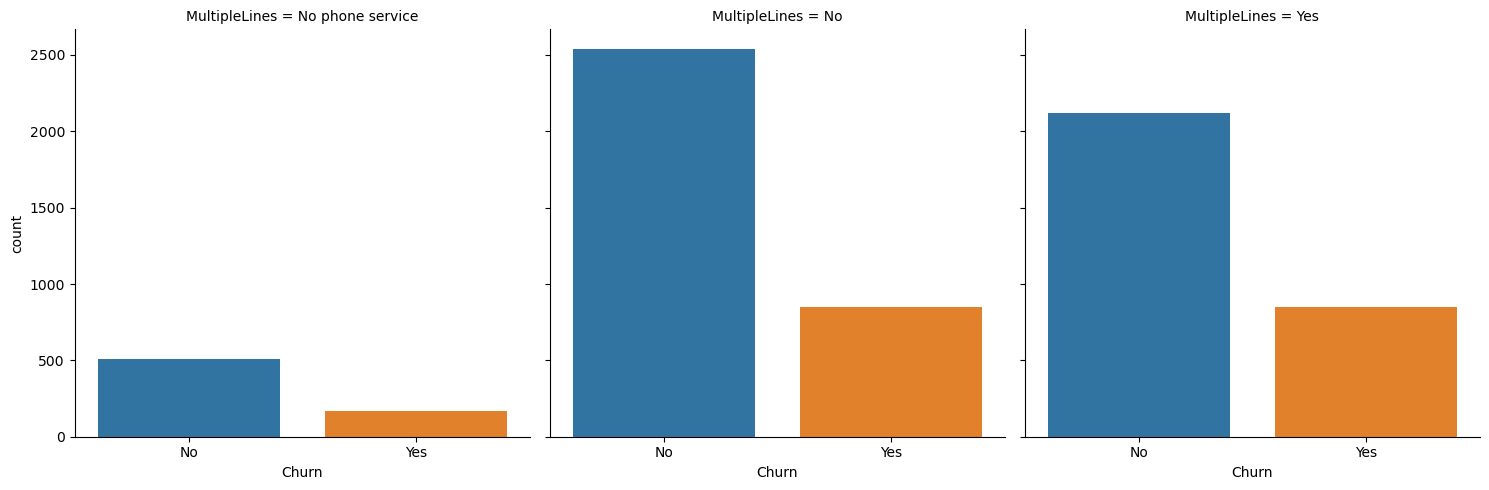

In [177]:
#Checking churn level in  Multiplelines
sns.catplot(x='Churn', col='MultipleLines', data=df, kind='count')
plt.show()

Those customers who have phone service form single line have high churn rate compared to the customer who have multiple lines, also there are very less number of customers who do not have phone services

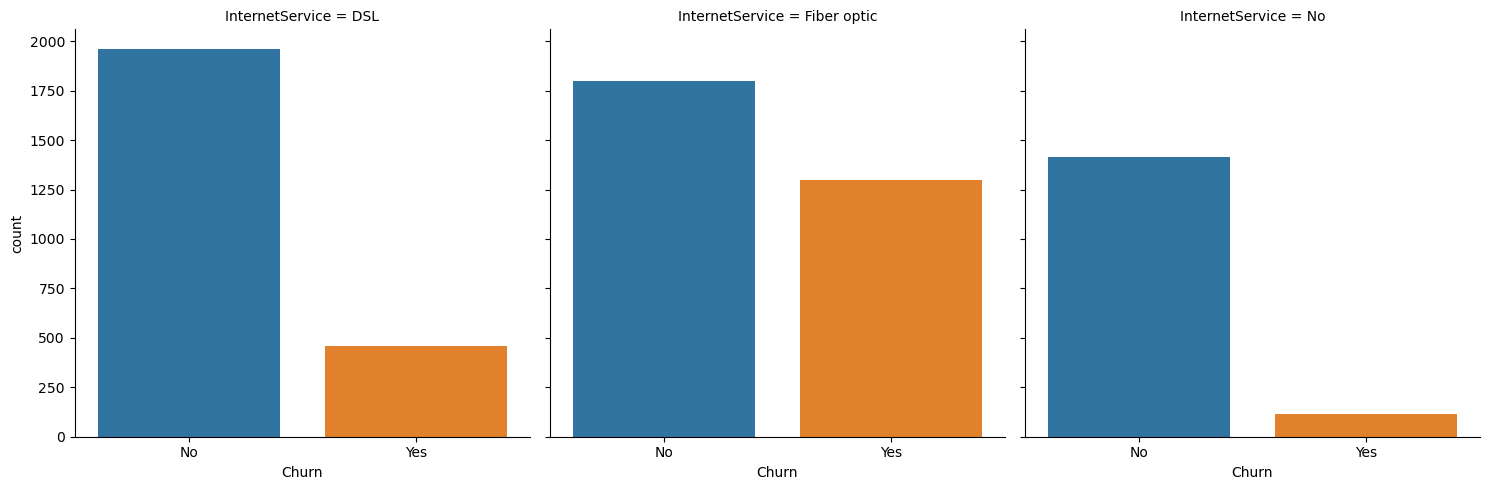

In [178]:
#Checking churn level in Internet service
sns.catplot(x='Churn', col='InternetService', data=df, kind='count')
plt.show()

The ratio is high when customers have fiber optic as compared to dsl and no internet service

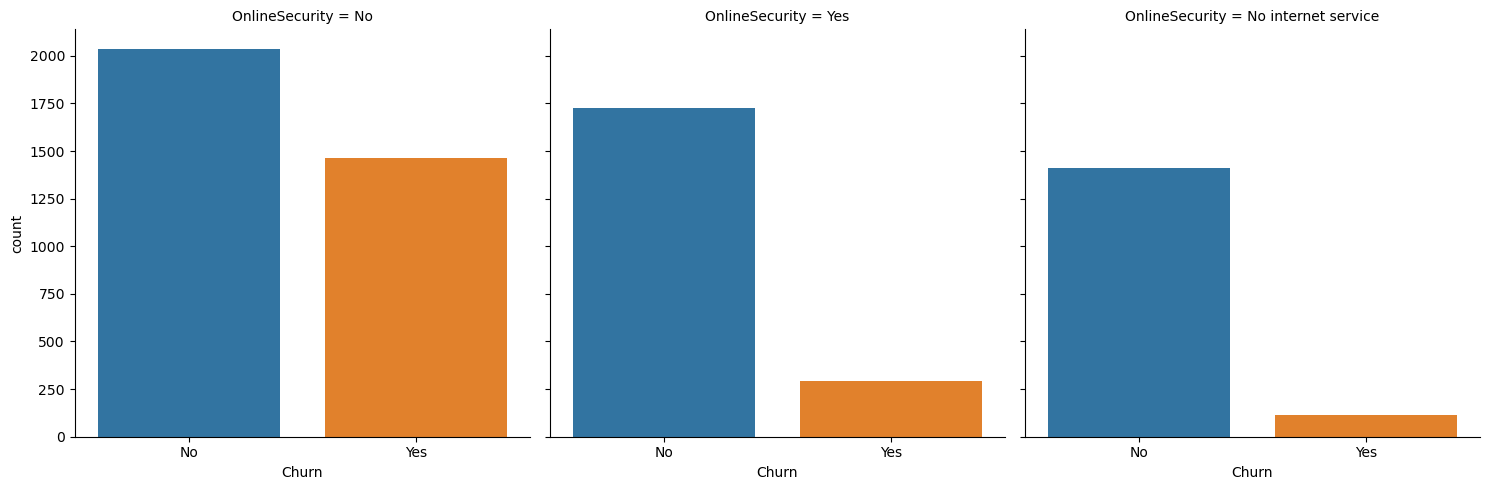

In [179]:
#Checking churn level in Online Security
sns.catplot(x='Churn', col='OnlineSecurity', data=df, kind='count')
plt.show()

Customer who have no internet secuirty has very less churn rate compared to the customers who have no online security has level of getting churned

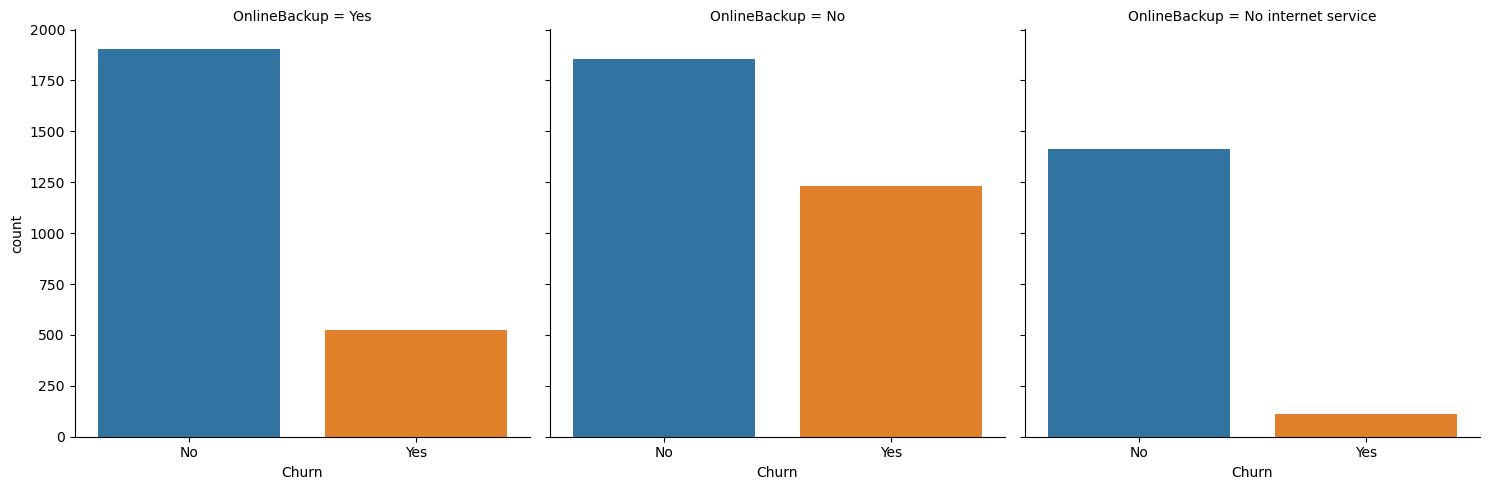

In [180]:
#Checking churn level in Online Backup
sns.catplot(x='Churn', col='OnlineBackup', data=df, kind='count')
plt.show()

there is not much differnce between customer who has online backup and customer who do not have

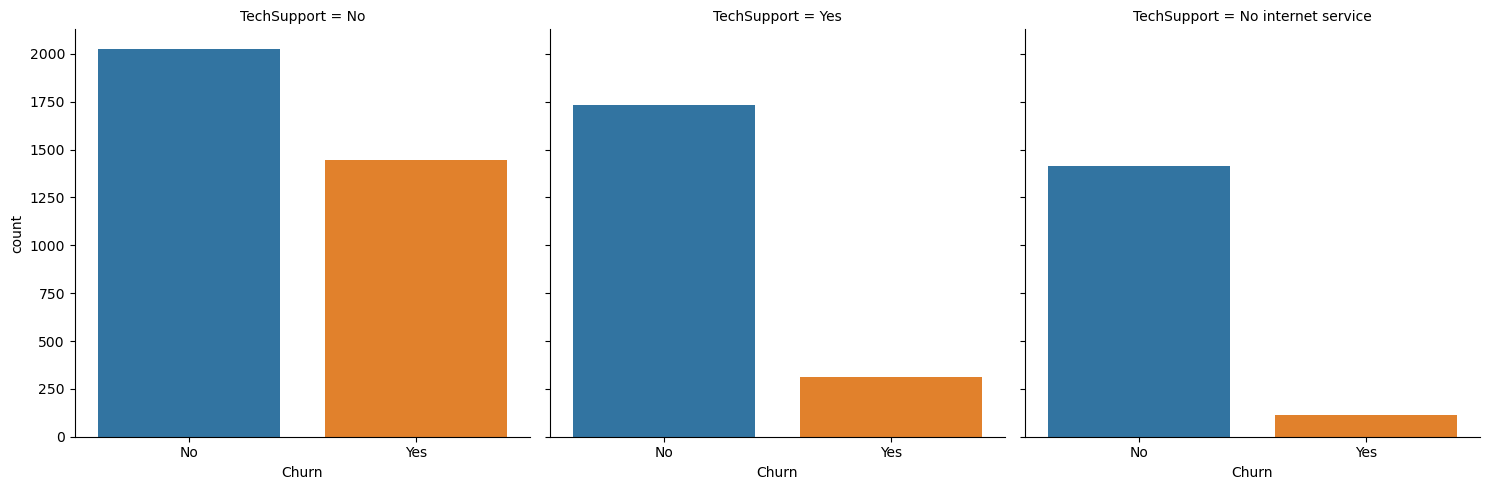

In [181]:
#Checking churn level in TechSupport Security
sns.catplot(x='Churn', col='TechSupport', data=df, kind='count')
plt.show()

Those who no internet service less churn rate thos who have no tech support have high tendency of churn rate as comapred to who have techsupport

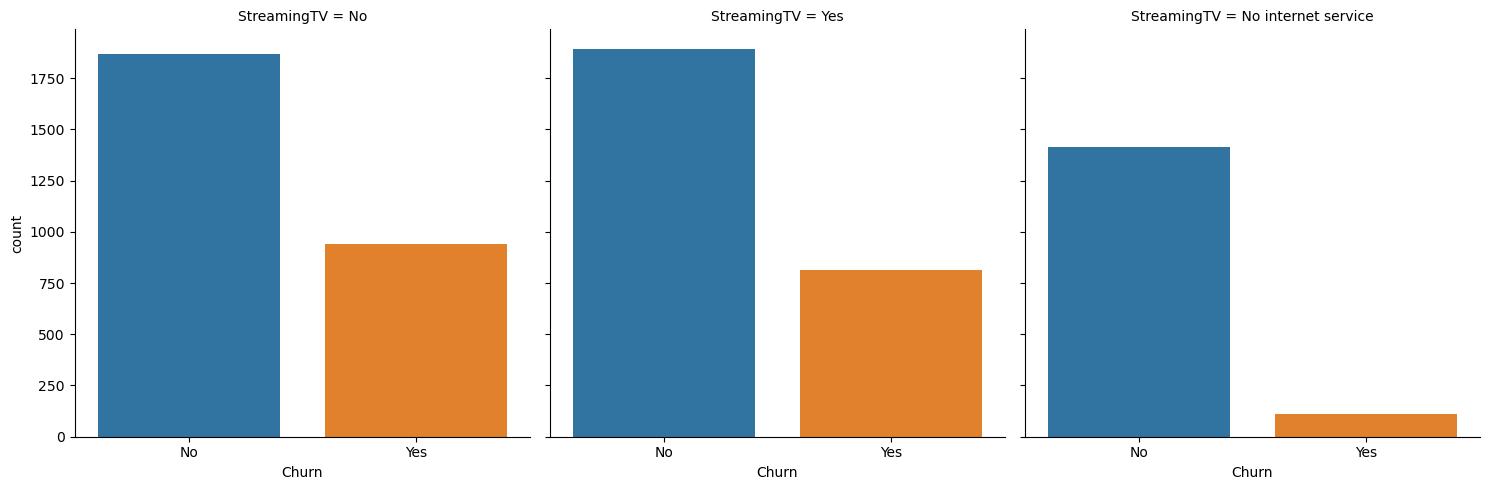

In [182]:
#Checking churn in Streaming TV
sns.catplot(x='Churn', col='StreamingTV', data=df, kind='count')
plt.show()

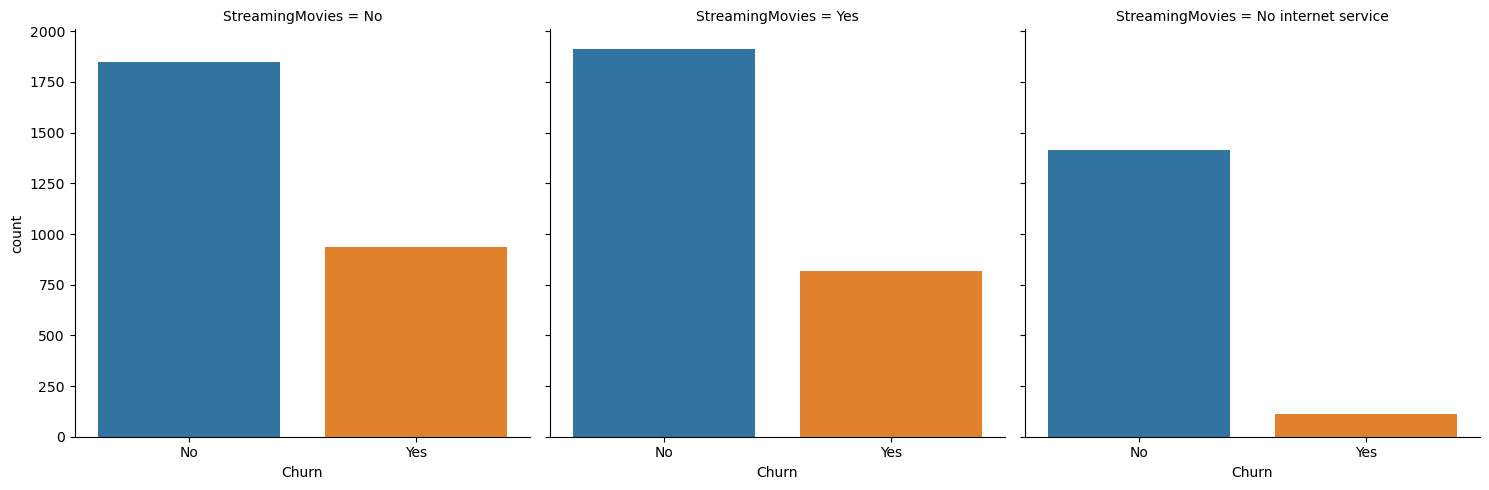

In [183]:
#Checking churn in Streaming Movies
sns.catplot(x='Churn', col='StreamingMovies', data=df, kind='count')
plt.show()

There is not much difference thise whose has streaming movies and those who do not have

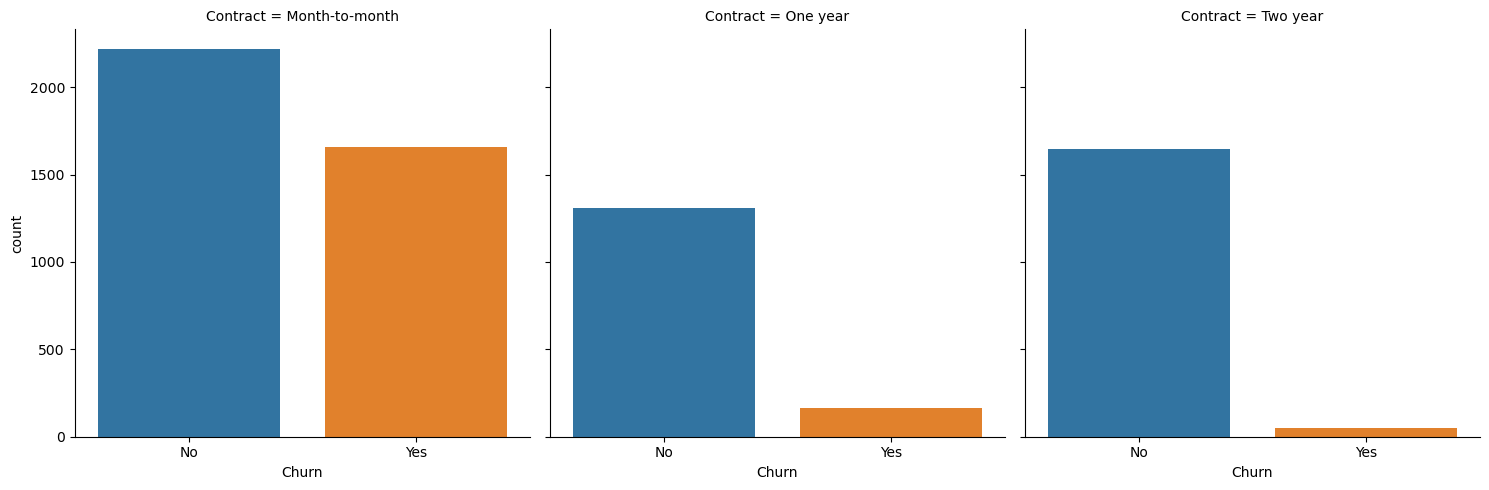

In [184]:
#Checking churn level in contract
sns.catplot(x='Churn',col ='Contract', data=df, kind='count')
plt.show()

as we see contract per year customers has low ratio for churning adn high ratio for monthly contractor

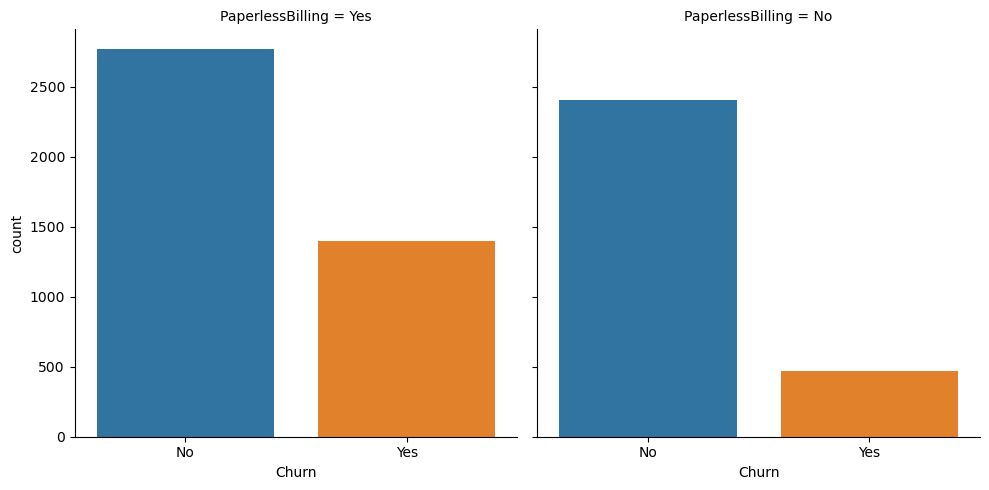

In [185]:
#Checking churn level in PaperlessBilling
sns.catplot(x='Churn', col='PaperlessBilling',data= df, kind= 'count')
plt.show()

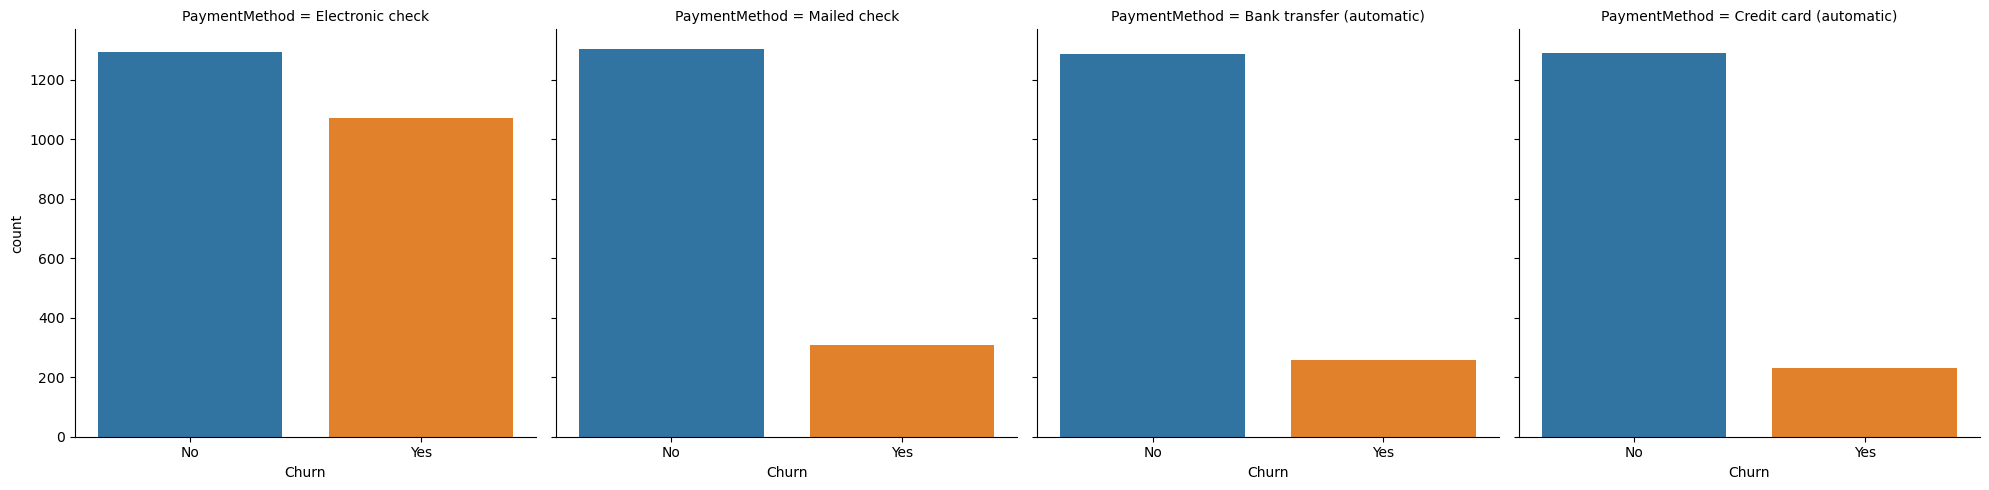

In [186]:
#Checking churn level in Payment method
sns.catplot(x='Churn', col='PaymentMethod', data=df, kind= 'count')
plt.show()

# MultiVariate Analysis

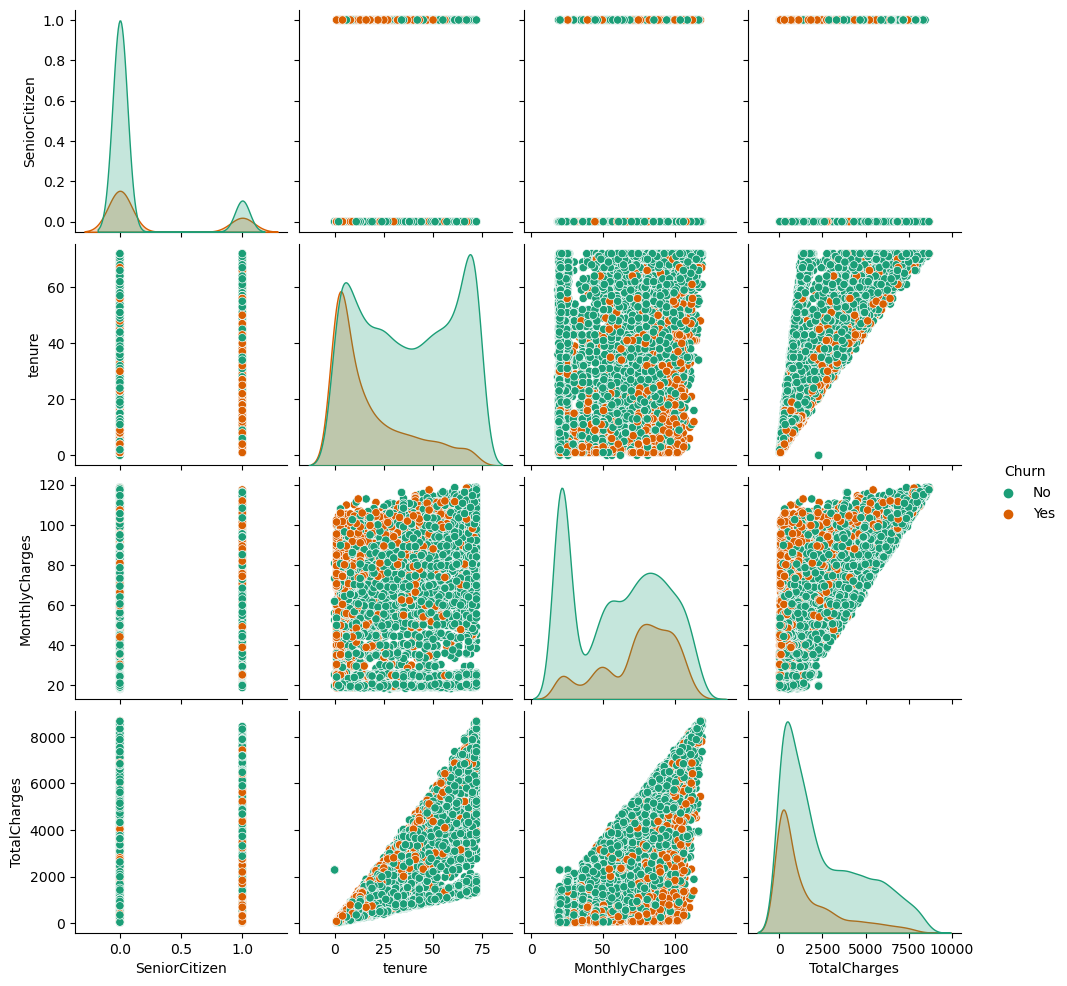

In [187]:
sns.pairplot(df,hue='Churn', palette='Dark2')
plt.show()

1) The Pairplot gives the pairwise relation between the features on the basis of target "Churn". On the diagonal we can notice the distribution plots.

2) The features tenure and TotalCharges, MonthlyCharges have strong relation with each other.

3) There are no outliers in any of the column but let's plot box plot to identify outliers


# Checking for outlier

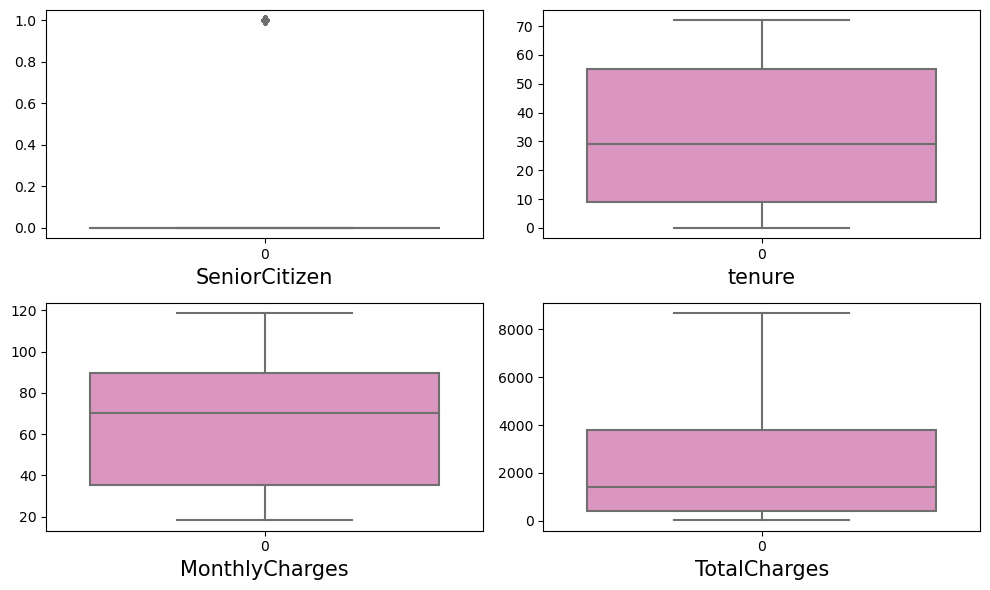

In [188]:
plt.figure(figsize=(10,6), facecolor='white')
plotnumber=1
for col in numerical_col:
    if plotnumber<=4:
        ax= plt.subplot(2,2, plotnumber)
        sns.boxplot(df[col], palette= "Set2_r")
        plt.xlabel(col, fontsize=15)
        plt.yticks(rotation=0, fontsize=10)
    plotnumber+=1
plt.tight_layout()

The column senior citizen has outliers but categorical data so no need to remove it. Apart from this none of column has outlier

**Checking for skewness

#df.skew not working but skewness values should be -0.5 to 0.5 now we have skewness in SeniorCitizen and Total Cahrges but no need to remove from senior citizen it is categorical data and Total charges is continous in nature, lets use cube root to remove skewness

Remove Skewness

In [192]:
df['TotalCharges'] = np.cbrt(df['TotalCharges'])


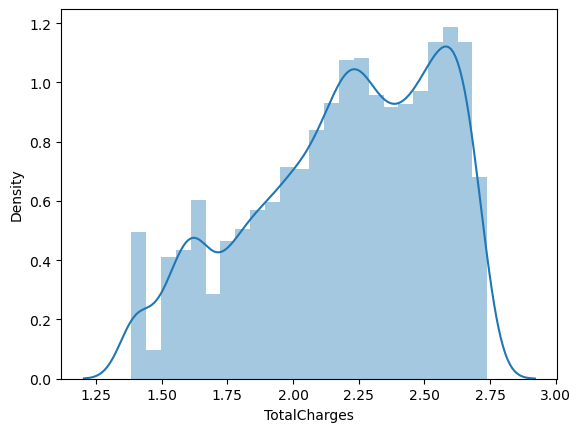

In [195]:
sns.distplot(df['TotalCharges'])
plt.show()

# Encoding Categorical Columns

In [197]:
from sklearn.preprocessing import OrdinalEncoder
OE= OrdinalEncoder()
for i in df.columns:
    if df[i].dtypes=='object':
        df[i]= OE.fit_transform(df[i].values.reshape(-1,1))
df

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,0.0,0,1.0,0.0,1,0.0,1.0,0.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,1.0,2.0,29.85,1.458420,0.0
1,1.0,0,0.0,0.0,34,1.0,0.0,0.0,2.0,0.0,2.0,0.0,0.0,0.0,1.0,0.0,3.0,56.95,2.312270,0.0
2,1.0,0,0.0,0.0,2,1.0,0.0,0.0,2.0,2.0,0.0,0.0,0.0,0.0,0.0,1.0,3.0,53.85,1.682685,1.0
3,1.0,0,0.0,0.0,45,0.0,1.0,0.0,2.0,0.0,2.0,2.0,0.0,0.0,1.0,0.0,0.0,42.30,2.305564,0.0
4,0.0,0,0.0,0.0,2,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,2.0,70.70,1.747092,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,1.0,0,1.0,1.0,24,1.0,2.0,0.0,2.0,0.0,2.0,2.0,2.0,2.0,1.0,1.0,3.0,84.80,2.325687,0.0
7039,0.0,0,1.0,1.0,72,1.0,2.0,1.0,0.0,2.0,2.0,0.0,2.0,2.0,1.0,1.0,1.0,103.20,2.689503,0.0
7040,0.0,0,1.0,1.0,11,0.0,1.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,2.0,29.60,1.915060,0.0
7041,1.0,1,1.0,0.0,4,1.0,2.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,3.0,74.40,1.889234,1.0


In [198]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 20 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   gender            7043 non-null   float64
 1   SeniorCitizen     7043 non-null   int64  
 2   Partner           7043 non-null   float64
 3   Dependents        7043 non-null   float64
 4   tenure            7043 non-null   int64  
 5   PhoneService      7043 non-null   float64
 6   MultipleLines     7043 non-null   float64
 7   InternetService   7043 non-null   float64
 8   OnlineSecurity    7043 non-null   float64
 9   OnlineBackup      7043 non-null   float64
 10  DeviceProtection  7043 non-null   float64
 11  TechSupport       7043 non-null   float64
 12  StreamingTV       7043 non-null   float64
 13  StreamingMovies   7043 non-null   float64
 14  Contract          7043 non-null   float64
 15  PaperlessBilling  7043 non-null   float64
 16  PaymentMethod     7043 non-null   float64


In [199]:
df.describe()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
count,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000
mean,0.504756,0.162147,0.483033,0.299588,32.371149,0.903166,0.940508,0.872923,0.790004,0.906432,0.904444,0.797104,0.985376,0.992475,0.690473,0.592219,1.574329,64.761692,2.193305,0.265370
std,0.500013,0.368612,0.499748,0.458110,24.559481,0.295752,0.948554,0.737796,0.859848,0.880162,0.879949,0.861551,0.885002,0.885091,0.833755,0.491457,1.068104,30.090047,0.354783,0.441561
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,18.250000,1.385393,0.000000
25%,0.000000,0.000000,0.000000,0.000000,9.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,35.500000,1.947087,0.000000
50%,1.000000,0.000000,0.000000,0.000000,29.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,1.000000,2.000000,70.350000,2.236602,0.000000
75%,1.000000,0.000000,1.000000,1.000000,55.000000,1.000000,2.000000,1.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,1.000000,1.000000,2.000000,89.850000,2.497947,1.000000
max,1.000000,1.000000,1.000000,1.000000,72.000000,1.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,1.000000,3.000000,118.750000,2.739302,1.000000


**Corelation between label and features**

In [200]:
cor= df.corr()
cor

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
gender,1.000000,-0.001874,-0.001808,0.010517,0.005106,-0.006488,-0.006739,-0.000863,-0.015017,-0.012057,0.000549,-0.006825,-0.006421,-0.008743,0.000126,-0.011754,0.017352,-0.014569,-0.004493,-0.008612
SeniorCitizen,-0.001874,1.000000,0.016479,-0.211185,0.016567,0.008576,0.146185,-0.032310,-0.128221,-0.013632,-0.021398,-0.151268,0.030776,0.047266,-0.142554,0.156530,-0.038551,0.220173,0.103103,0.150889
Partner,-0.001808,0.016479,1.000000,0.452676,0.379697,0.017706,0.142410,0.000891,0.150828,0.153130,0.166330,0.126733,0.137341,0.129574,0.294806,-0.014877,-0.154798,0.096848,0.343126,-0.150448
Dependents,0.010517,-0.211185,0.452676,1.000000,0.159712,-0.001762,-0.024991,0.044590,0.152166,0.091015,0.080537,0.133524,0.046885,0.021321,0.243187,-0.111377,-0.040292,-0.113890,0.092619,-0.164221
tenure,0.005106,0.016567,0.379697,0.159712,1.000000,0.008448,0.343032,-0.030359,0.325468,0.370876,0.371105,0.322942,0.289373,0.296866,0.671607,0.006152,-0.370436,0.247900,0.850628,-0.352229
PhoneService,-0.006488,0.008576,0.017706,-0.001762,0.008448,1.000000,-0.020538,0.387436,-0.015198,0.024105,0.003727,-0.019158,0.055353,0.043870,0.002247,0.016505,-0.004184,0.247398,0.077696,0.011942
MultipleLines,-0.006739,0.146185,0.142410,-0.024991,0.343032,-0.020538,1.000000,-0.109216,0.007141,0.117327,0.122318,0.011466,0.175059,0.180957,0.110842,0.165146,-0.176793,0.433576,0.448354,0.038037
InternetService,-0.000863,-0.032310,0.000891,0.044590,-0.030359,0.387436,-0.109216,1.000000,-0.028416,0.036138,0.044944,-0.026047,0.107417,0.098350,0.099721,-0.138625,0.086140,-0.323260,-0.206824,-0.047291
OnlineSecurity,-0.015017,-0.128221,0.150828,0.152166,0.325468,-0.015198,0.007141,-0.028416,1.000000,0.185126,0.175985,0.285028,0.044669,0.055954,0.374416,-0.157641,-0.096726,-0.053878,0.232346,-0.289309
OnlineBackup,-0.012057,-0.013632,0.153130,0.091015,0.370876,0.024105,0.117327,0.036138,0.185126,1.000000,0.187757,0.195748,0.147186,0.136722,0.280980,-0.013370,-0.124847,0.119777,0.326760,-0.195525


**Visualize corelation by plotting heatmap**

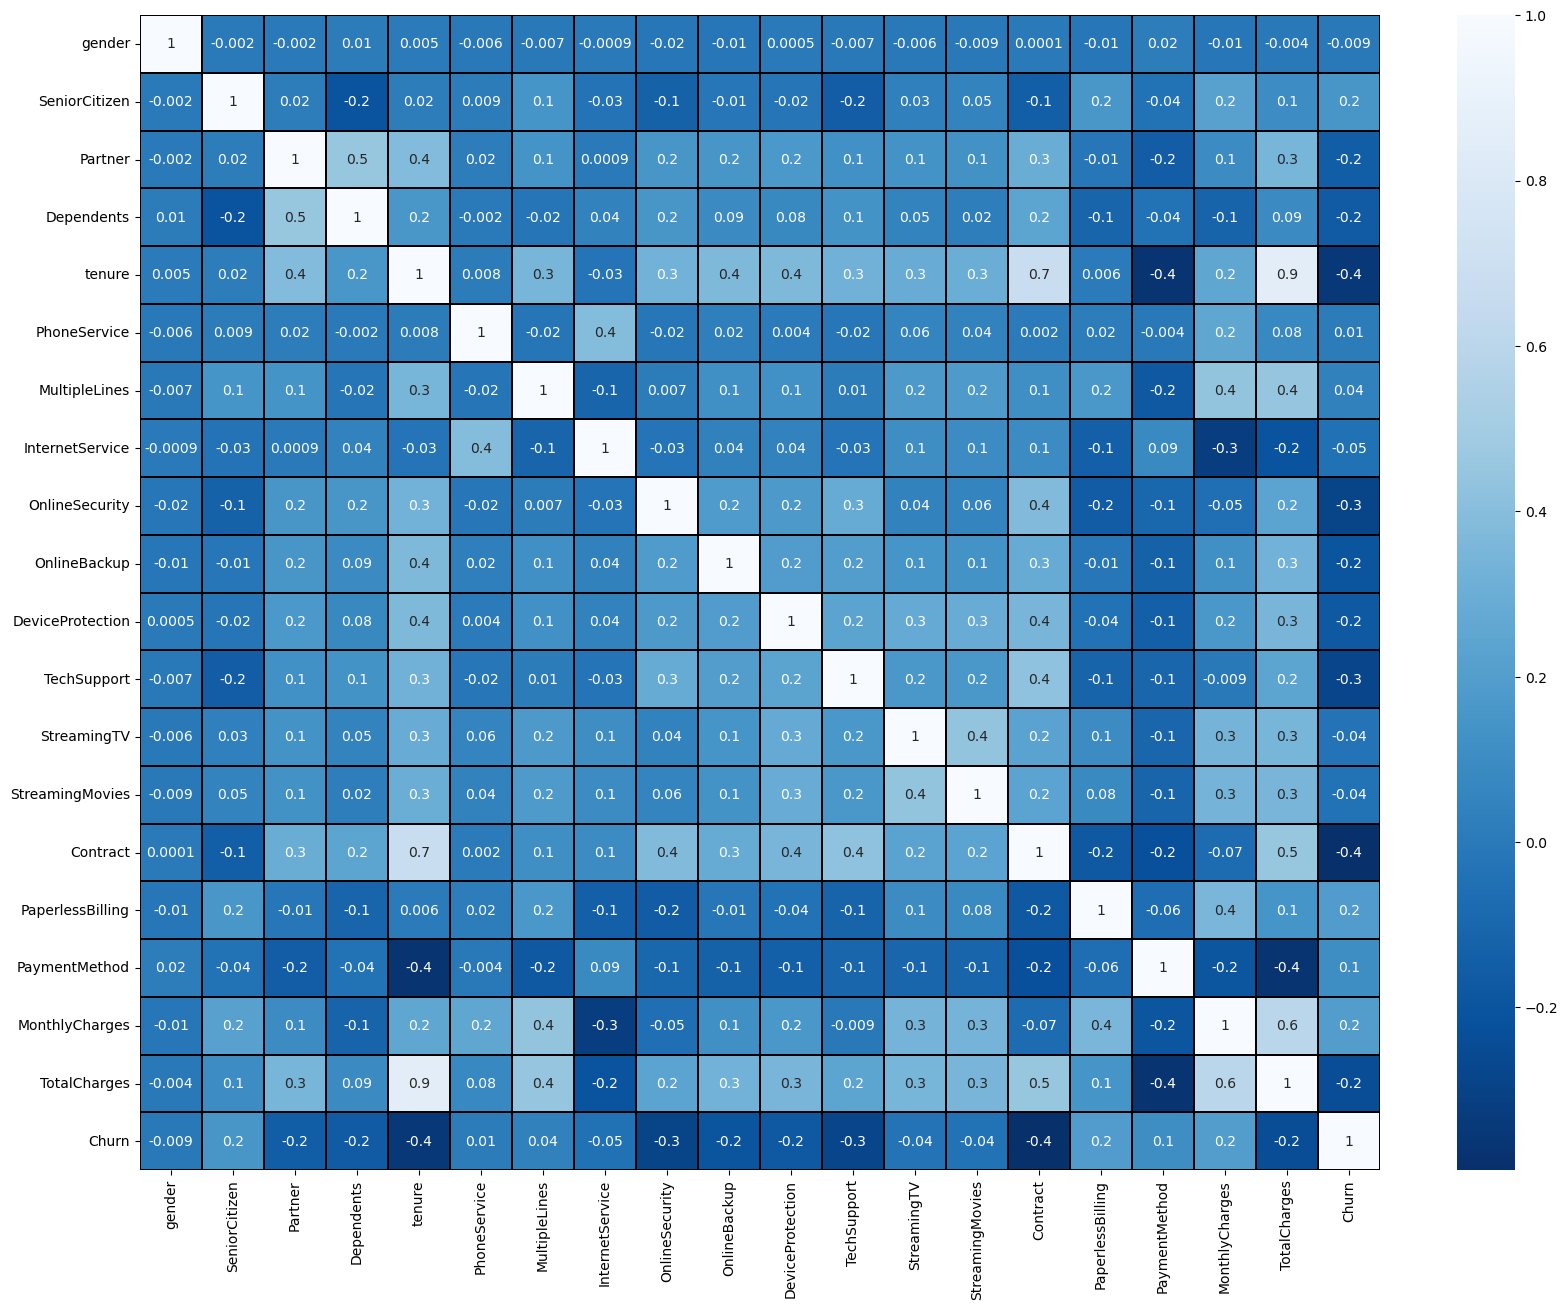

In [201]:
plt.figure(figsize=(20,15))
sns.heatmap(df.corr(), linewidths=0.1, fmt=".1g", linecolor='black', annot=True, cmap= "Blues_r")
plt.yticks(rotation=0);
plt.show()

0 no corelation, -0.3 to 0.3 less corelation, greater than -0.5 or greater than +0.5 moderate corelation, grreater than -0.7 and greater +0.7 high corelation



1) There is no much positive corelation between features and label.
2) The column MonthlyCharges, Paperlessbilling, SeniorCitizen and Payment method have positive corelation with the label column Churn
3) The label is negatively corelated with Contract, tenure, OnlineSecuirty, TechSuport, TotalCharges, DeviceProtection, OnlineBackup, Partner and Dependenets.
4) Also the column gender has very corelated with the label, we can drop it if necessary
5) The column TotalCharges and tenure, Contract and tenure, TotalCharge and MonthlyCharges and many other have hugh corelation with each other

**Visualize the corelation between label and features using bar plot**

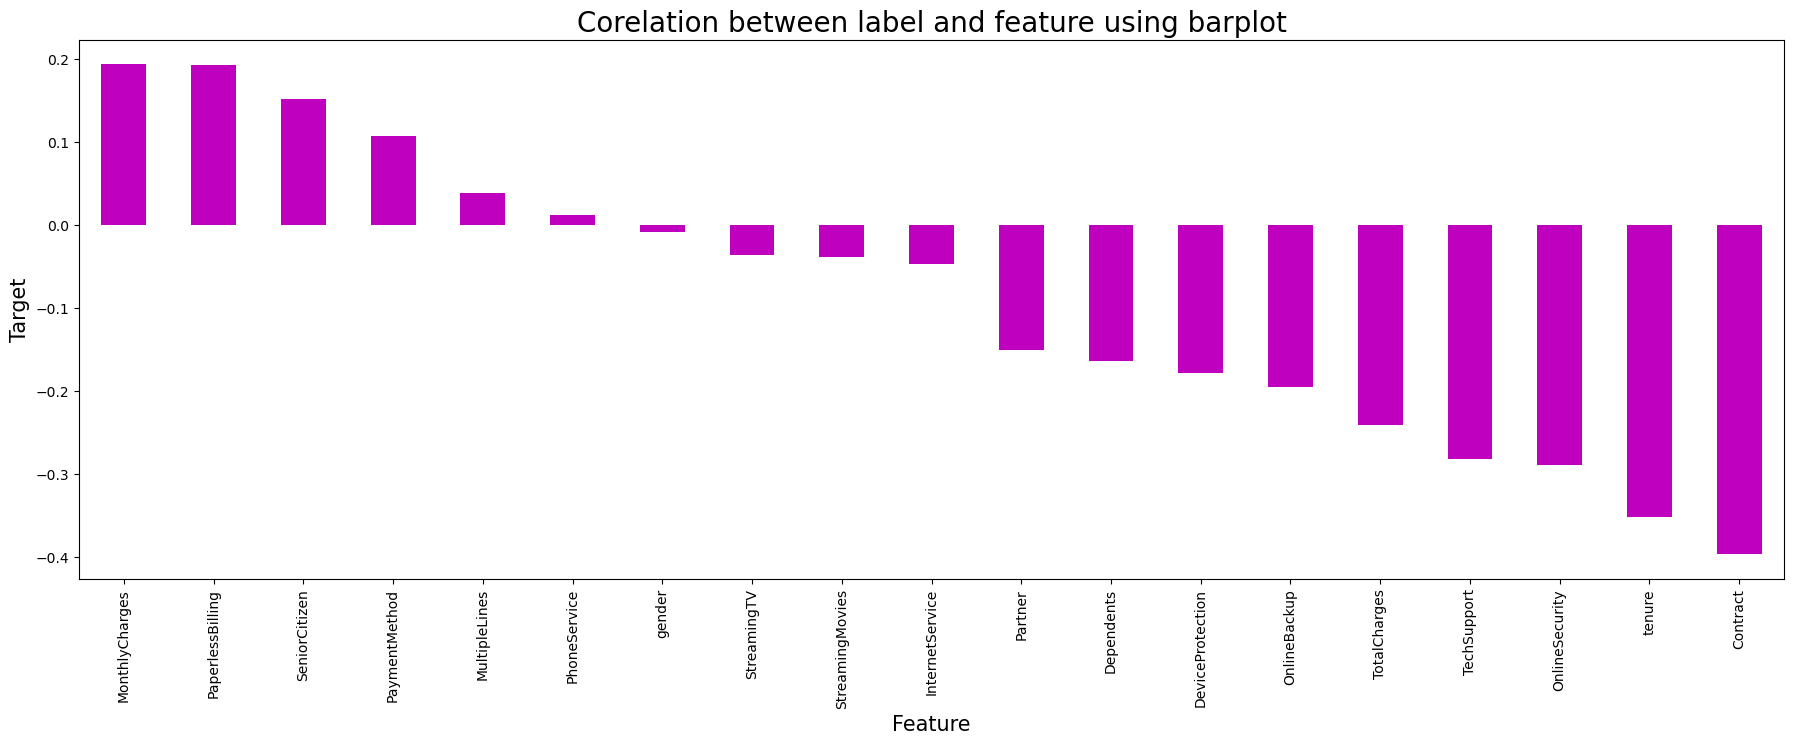

In [206]:
plt.figure(figsize=(22,7))
df.corr()['Churn'].sort_values(ascending=False).drop(['Churn']).plot(kind='bar', color='m')
plt.xlabel('Feature', fontsize=15)
plt.ylabel('Target', fontsize=15)
plt.title("Corelation between label and feature using barplot", fontsize=20)
plt.show()

In [202]:
cor['Churn'].sort_values(ascending=False)

Churn               1.000000
MonthlyCharges      0.193356
PaperlessBilling    0.191825
SeniorCitizen       0.150889
PaymentMethod       0.107062
MultipleLines       0.038037
PhoneService        0.011942
gender             -0.008612
StreamingTV        -0.036581
StreamingMovies    -0.038492
InternetService    -0.047291
Partner            -0.150448
Dependents         -0.164221
DeviceProtection   -0.178134
OnlineBackup       -0.195525
TotalCharges       -0.241266
TechSupport        -0.282492
OnlineSecurity     -0.289309
tenure             -0.352229
Contract           -0.396713
Name: Churn, dtype: float64

**Separating features and label**

In [203]:
x= df.drop("Churn", axis=1)
y= df["Churn"]


Feature Scaling using Standard Scalarization

In [204]:
from sklearn.preprocessing import StandardScaler
scaler= StandardScaler()
x= pd.DataFrame(scaler.fit_transform(x), columns= x.columns)
x

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges
0,-1.009559,-0.439916,1.034530,-0.654012,-1.277445,-3.054010,0.062723,-1.183234,-0.918838,1.242550,-1.027910,-0.925262,-1.113495,-1.121405,-0.828207,0.829798,0.398558,-1.160323,-2.071510
1,0.990532,-0.439916,-0.966622,-0.654012,0.066327,0.327438,-0.991588,-1.183234,1.407321,-1.029919,1.245111,-0.925262,-1.113495,-1.121405,0.371271,-1.205113,1.334863,-0.259629,0.335342
2,0.990532,-0.439916,-0.966622,-0.654012,-1.236724,0.327438,-0.991588,-1.183234,1.407321,1.242550,-1.027910,-0.925262,-1.113495,-1.121405,-0.828207,0.829798,1.334863,-0.362660,-1.439346
3,0.990532,-0.439916,-0.966622,-0.654012,0.514251,-3.054010,0.062723,-1.183234,1.407321,-1.029919,1.245111,1.396299,-1.113495,-1.121405,0.371271,-1.205113,-1.474052,-0.746535,0.316440
4,-1.009559,-0.439916,-0.966622,-0.654012,-1.236724,0.327438,-0.991588,0.172250,-0.918838,-1.029919,-1.027910,-0.925262,-1.113495,-1.121405,-0.828207,0.829798,0.398558,0.197365,-1.257795
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,0.990532,-0.439916,1.034530,1.529024,-0.340876,0.327438,1.117034,-1.183234,1.407321,-1.029919,1.245111,1.396299,1.146547,1.138411,0.371271,0.829798,1.334863,0.665992,0.373164
7039,-1.009559,-0.439916,1.034530,1.529024,1.613701,0.327438,1.117034,0.172250,-0.918838,1.242550,1.245111,-0.925262,1.146547,1.138411,0.371271,0.829798,-0.537747,1.277533,1.398697
7040,-1.009559,-0.439916,1.034530,1.529024,-0.870241,-3.054010,0.062723,-1.183234,1.407321,-1.029919,-1.027910,-0.925262,-1.113495,-1.121405,-0.828207,0.829798,0.398558,-1.168632,-0.784324
7041,0.990532,2.273159,1.034530,-0.654012,-1.155283,0.327438,1.117034,0.172250,-0.918838,-1.029919,-1.027910,-0.925262,-1.113495,-1.121405,-0.828207,0.829798,1.334863,0.320338,-0.857121


**Checking Variance Inflation (VIF)**

In [208]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
vif= pd.DataFrame()
vif["VIF values"]= [variance_inflation_factor(x.values,i)for i in range(len(x.columns))]
vif["Features"]=x.columns
vif

,VIF values,Features
0,1.001737,gender
1,1.149755,SeniorCitizen
2,1.463077,Partner
3,1.384853,Dependents
4,7.781965,tenure
5,1.622374,PhoneService
6,1.395509,MultipleLines
7,1.856408,InternetService
8,1.248756,OnlineSecurity
9,1.186012,OnlineBackup


By checking VIF values we can find the features causing multicolinearity problem. Here we can find the feature TotalCharges and high VIF value greater than 5 which means they have hughly corelated with other features. We will drop one of the column first, if the same issue exist then we will try to remove the column having high VIF.

In [209]:
#Dropping the total charges column
x.drop("TotalCharges", axis=1, inplace=True)


In [210]:
vif= pd.DataFrame()
vif["VIF values"]= [variance_inflation_factor(x.values,i)for i in range(len(x.columns))]
vif["Features"]=x.columns
vif

,VIF values,Features
0,1.001684,gender
1,1.149639,SeniorCitizen
2,1.460856,Partner
3,1.382106,Dependents
4,2.754468,tenure
5,1.622282,PhoneService
6,1.391652,MultipleLines
7,1.825876,InternetService
8,1.247696,OnlineSecurity
9,1.185932,OnlineBackup


So we have solved multicolinearity issue now we can move ahead to build model

In [212]:
y.value_counts()

Churn
0.0    5174
1.0    1869
Name: count, dtype: int64

Data is imbalance so now we will balance the data by sampling method

In [216]:
#!pip install imblearn
from imblearn.over_sampling import SMOTE
SM= SMOTE()
x1,y1= SM.fit_resample(x,y)

In [217]:
y.value_counts()

Churn
0.0    5174
1.0    1869
Name: count, dtype: int64

In [218]:
y1.value_counts()

Churn
0.0    5174
1.0    5174
Name: count, dtype: int64

# Model building

In [221]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

maxAccu=0
maxRS=0

for i in range(1,200):
    x_train, x_test, y_train, y_test= train_test_split(x1,y1, test_size=0.30, random_state=i)
    RFR= RandomForestClassifier()
    RFR.fit(x_train, y_train)
    pred= RFR.predict(x_test)
    acc= accuracy_score(y_test, pred)
    if acc>maxAccu:
        maxAccu= acc
        maxRS=i
print("Best Accuracy is ", maxAccu,"at random state", maxRS)

Best Accuracy is  0.8679549114331723 at random state 102
